# Lista 002 - Pandas, Matplotlib, GeoPandas e Folium.

___
#### 1. Monte um dataframe contendo todas as informações dos arquivos csv em 'data/transito'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import datetime as dt
import folium as fl
import geopandas

In [2]:
df_transito = pd.DataFrame()
listaArquivos= []
arquivos = glob.glob(r'../data/transito/' + '/*.csv')
for filename in arquivos:
    df = pd.read_csv(filename, index_col=None, header=0, sep=';',usecols=["grav_tipo","hora_cometimento","cometimento","tipo_infrator","tipo_infracao","tipo_veiculo"]) 
    listaArquivos.append(df)
df_transito = pd.concat(listaArquivos, ignore_index='true')
df_transito.to_csv (r'transito.csv', index = False, header=True)

In [3]:
df_transito.loc[0]

tipo_infracao             6769-0
tipo_infrator       Proprietário
tipo_veiculo           Automóvel
cometimento           01/03/2020
hora_cometimento           00:00
grav_tipo                  Média
Name: 0, dtype: object

___
#### 2. Quantos tipos diferentes de gravidade de infração exitem no dataset? Quais são?

In [4]:
# Recuperando apenas tipos diferentes de gravidade de infração
# df_transito["grav_tipo"].unique().shape
# df_transito["grav_tipo"].nunique()
# df_transito["grav_tipo"].value_counts()
df_transito["grav_tipo"].unique()

array(['Média', 'Gravíssima', 'Grave', 'Leve'], dtype=object)

___
#### 3. Qual a hora do dia que mais se cometem infrações graves? Demonstre utilizando um gráfico de linhas.

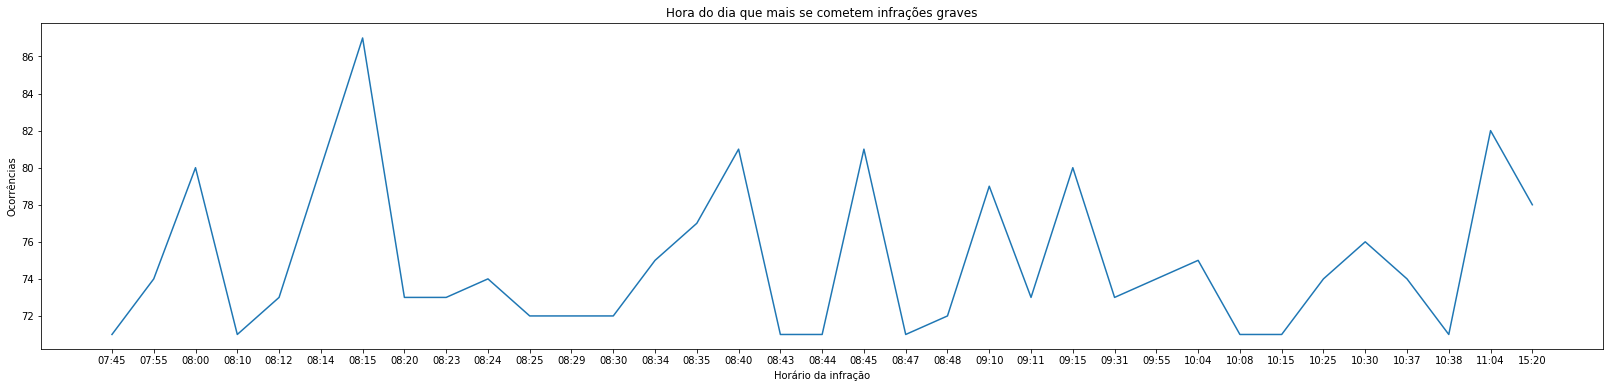

In [5]:
infracoes_graves_hora = (
    df_transito[['cometimento','hora_cometimento','grav_tipo']]
    .assign(cometimento = lambda x: pd.to_datetime(x.cometimento))
    .query('grav_tipo == "Grave"')
    .sort_values('hora_cometimento',ascending=True)
    .drop('grav_tipo',axis=1)
    .groupby(['hora_cometimento'],sort=False)
    .count()
    .query('cometimento > 70')
)

plt.figure(figsize=(28,6))
plt.plot(infracoes_graves_hora['cometimento'])
plt.title('Hora do dia que mais se cometem infrações graves') #adicionando o título
plt.ylabel('Ocorrências')#adicionando legenda eixo y
plt.xlabel('Horário da infração')#adicionando legenda eixo x
plt.show()

___
#### 4. Qual dia da semana que mais se cometem infrações leves? Demonstre utilizando um gráfico de linhas e colocando um texto no ponto máximo.

In [6]:
#df_transito.info()
df_transito['data'] = pd.to_datetime(df_transito['cometimento']) # Criação de nova coluna "data" utilizando to_datetime
df_transito['dia_da_semana'] = df_transito['data'].dt.dayofweek # Criação de nova coluna "dia_da_semana" utilizando dt.dayofweek
nome_dia={0:'Segunda', 1:'Terça', 2:'Quarta', 3:'Quinta', 4:'Sexta', 5:'Sábado', 6:'Domingo'}
df_transito['nome_dia'] = pd.to_datetime(df_transito['cometimento']).dt.dayofweek.map(nome_dia)

In [7]:
df_transito.query("grav_tipo == 'Leve'").nome_dia.value_counts()

Quinta     16637
Sexta      16471
Segunda    16004
Terça      15123
Quarta     14783
Sábado      5145
Domingo     4492
Name: nome_dia, dtype: int64

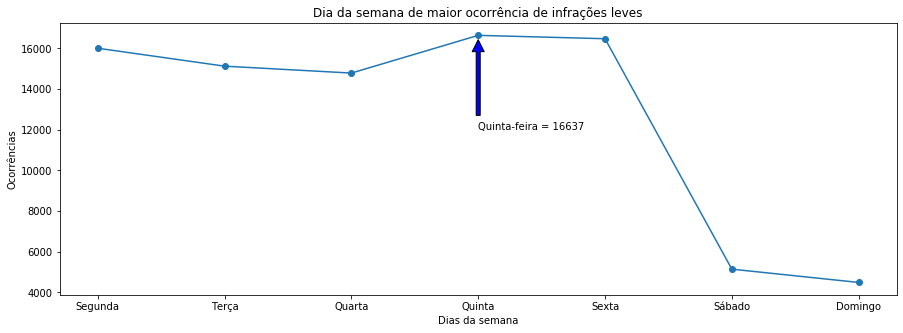

In [8]:
infracoes_leves_dia = (
    df_transito.loc[:,['grav_tipo','nome_dia','dia_da_semana']]
    .query('grav_tipo == "Leve"')
    .sort_values('dia_da_semana',ascending=True)
    .groupby('nome_dia',sort=False)
    .count()
)


plt.figure(figsize=(15,5))
plt.plot(infracoes_leves_dia['grav_tipo'], marker=r'o')
plt.savefig('../data/transito/infracoes_leves_dia.png')
plt.annotate('Quinta-feira = 16637', xy =(3, 16637), 
                xytext =('Quinta', 12000),  
                arrowprops = dict(facecolor ='blue', 
                                  shrink = 0.05),) 
plt.title('Dia da semana de maior ocorrência de infrações leves') #adicionando o título
plt.ylabel('Ocorrências')#adicionando legenda eixo y
plt.xlabel('Dias da semana')#adicionando legenda eixo x
plt.show()


___
#### 5. Filtre o dataset pelo tipo de condutor 'condutor', qual o tipo de infração mais comum? Em que horário ele mais acontece? Monte um subplot para demonstrar as duas informações utilizando gráficos.

In [9]:
#df_transito.query("tipo_infrator == 'Condutor'").tipo_infracao.value_counts()
infracao_mais_comum = (
    df_transito.loc[:,['tipo_infrator','tipo_infracao']]
    .query('tipo_infrator == "Condutor"')
    .groupby(['tipo_infracao'])
    .count()
    .query('tipo_infrator > 3000')
)
infracao_mais_comum

,tipo_infrator
tipo_infracao,
5185-1,7178
5185-2,3030
5681-0,85074
6050-3,3916
7455-0,297088
7463-0,27752
7471-0,4507
7633-1,6919
7633-2,7878


In [10]:
#df_transito.query("tipo_infrator == 'Condutor'").hora_cometimento.value_counts()
horario_maior_ocorrencia = (
    df_transito.loc[:,['tipo_infrator','hora_cometimento']]
    .query('tipo_infrator == "Condutor"')
    .groupby('hora_cometimento')
    .count()  
    .query('tipo_infrator > 600')
)
horario_maior_ocorrencia

,tipo_infrator
hora_cometimento,
15:04,612
15:10,628
15:15,611
15:20,641
15:21,621
15:25,616
15:30,604
15:31,610
15:33,606


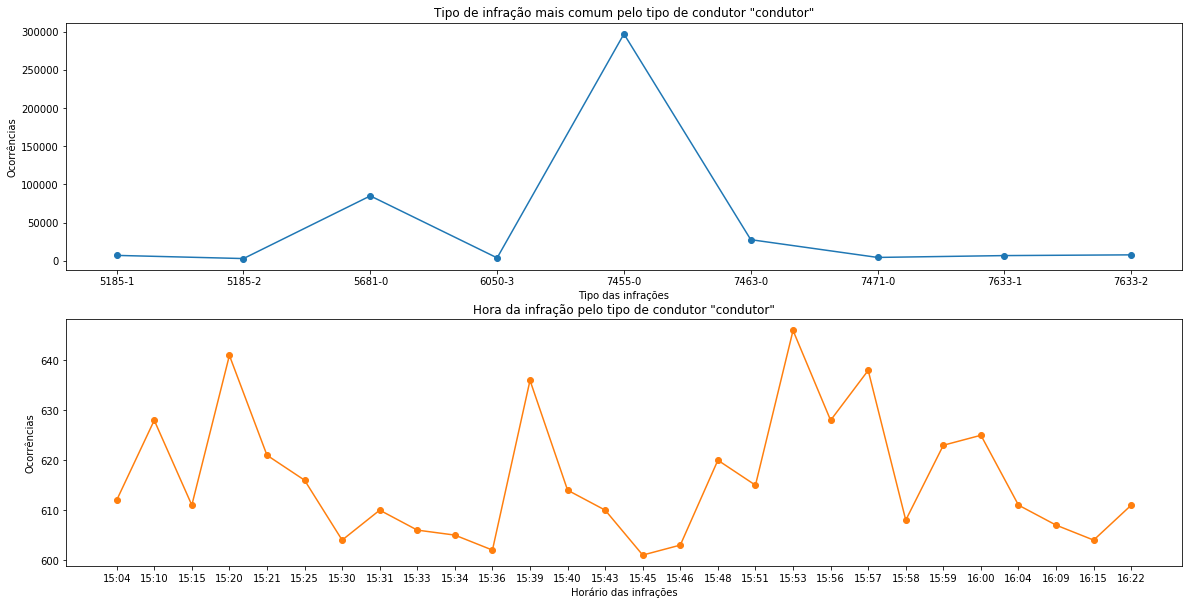

In [11]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(infracao_mais_comum['tipo_infrator'],marker='o',label='Tipo de Infração')
#plt.legend()
plt.title('Tipo de infração mais comum pelo tipo de condutor "condutor"') #adicionando o título
plt.ylabel('Ocorrências')#adicionando legenda eixo y
plt.xlabel('Tipo das infrações')#adicionando legenda eixo x


plt.subplot(2, 1, 2)
plt.plot(horario_maior_ocorrencia['tipo_infrator'],marker='o',color='tab:orange',label='Horario')
#plt.legend()
plt.title('Hora da infração pelo tipo de condutor "condutor"') #adicionando o título
plt.ylabel('Ocorrências')#adicionando legenda eixo y
plt.xlabel('Horário das infrações')#adicionando legenda eixo x


#plt.tight_layout()
plt.show()

___
#### 6. Monte um subplot com 7 heatmaps (1 para cada mês) demonstrando a concentração da quantidade infrações por dia do mês e hora do dia (desconsidere os minutos).

In [12]:
df_transito['data'] = pd.to_datetime(df_transito['cometimento'], format='%d/%m/%Y')
df_transito['mes'] = df_transito['data'].dt.month
df_transito['dia_mes'] = df_transito['data'].dt.day
nome_mes={1:'Janeiro', 2:'Fevereiro', 3:'Março', 4:'Abril', 5:'Maio', 6:'Junho', 7:'Julho'}
df_transito['nome_mes'] = pd.to_datetime(df_transito['data']).dt.month.map(nome_mes)

In [13]:
def split_hour(value):
    hour = value.split(":")
    return hour[0]

In [14]:
df_transito['hora'] = df_transito.hora_cometimento.apply(split_hour)

In [15]:
concentracao = (
    df_transito.pivot_table(index='hora',columns='dia_mes', values='mes',aggfunc='count' )
)
concentracao

dia_mes,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
hora,,,,,,,,,,,,,,,,,,,,,
00,357,270,306,284,272,237,277,284,255,303,...,255,274,243,285,292,237,245,233,136,199
01,315,200,199,204,219,180,198,229,236,188,...,195,205,160,223,219,175,180,173,116,167
02,311,185,115,175,130,135,157,207,171,129,...,124,125,128,129,138,87,120,111,86,98
03,215,151,127,143,167,138,169,185,156,143,...,126,135,92,123,137,138,105,105,76,110
04,219,161,157,162,170,128,191,184,173,138,...,124,186,115,144,147,123,131,106,56,78
05,293,224,276,250,241,262,231,231,247,254,...,225,217,222,174,212,196,156,218,156,141
06,490,486,542,450,495,429,480,441,442,453,...,489,433,351,329,327,372,381,362,339,247
07,694,915,801,722,591,739,705,775,658,785,...,943,722,659,542,486,606,623,543,521,361
08,912,1208,1082,961,851,1070,1175,1034,1087,954,...,966,851,905,716,729,959,846,912,719,457


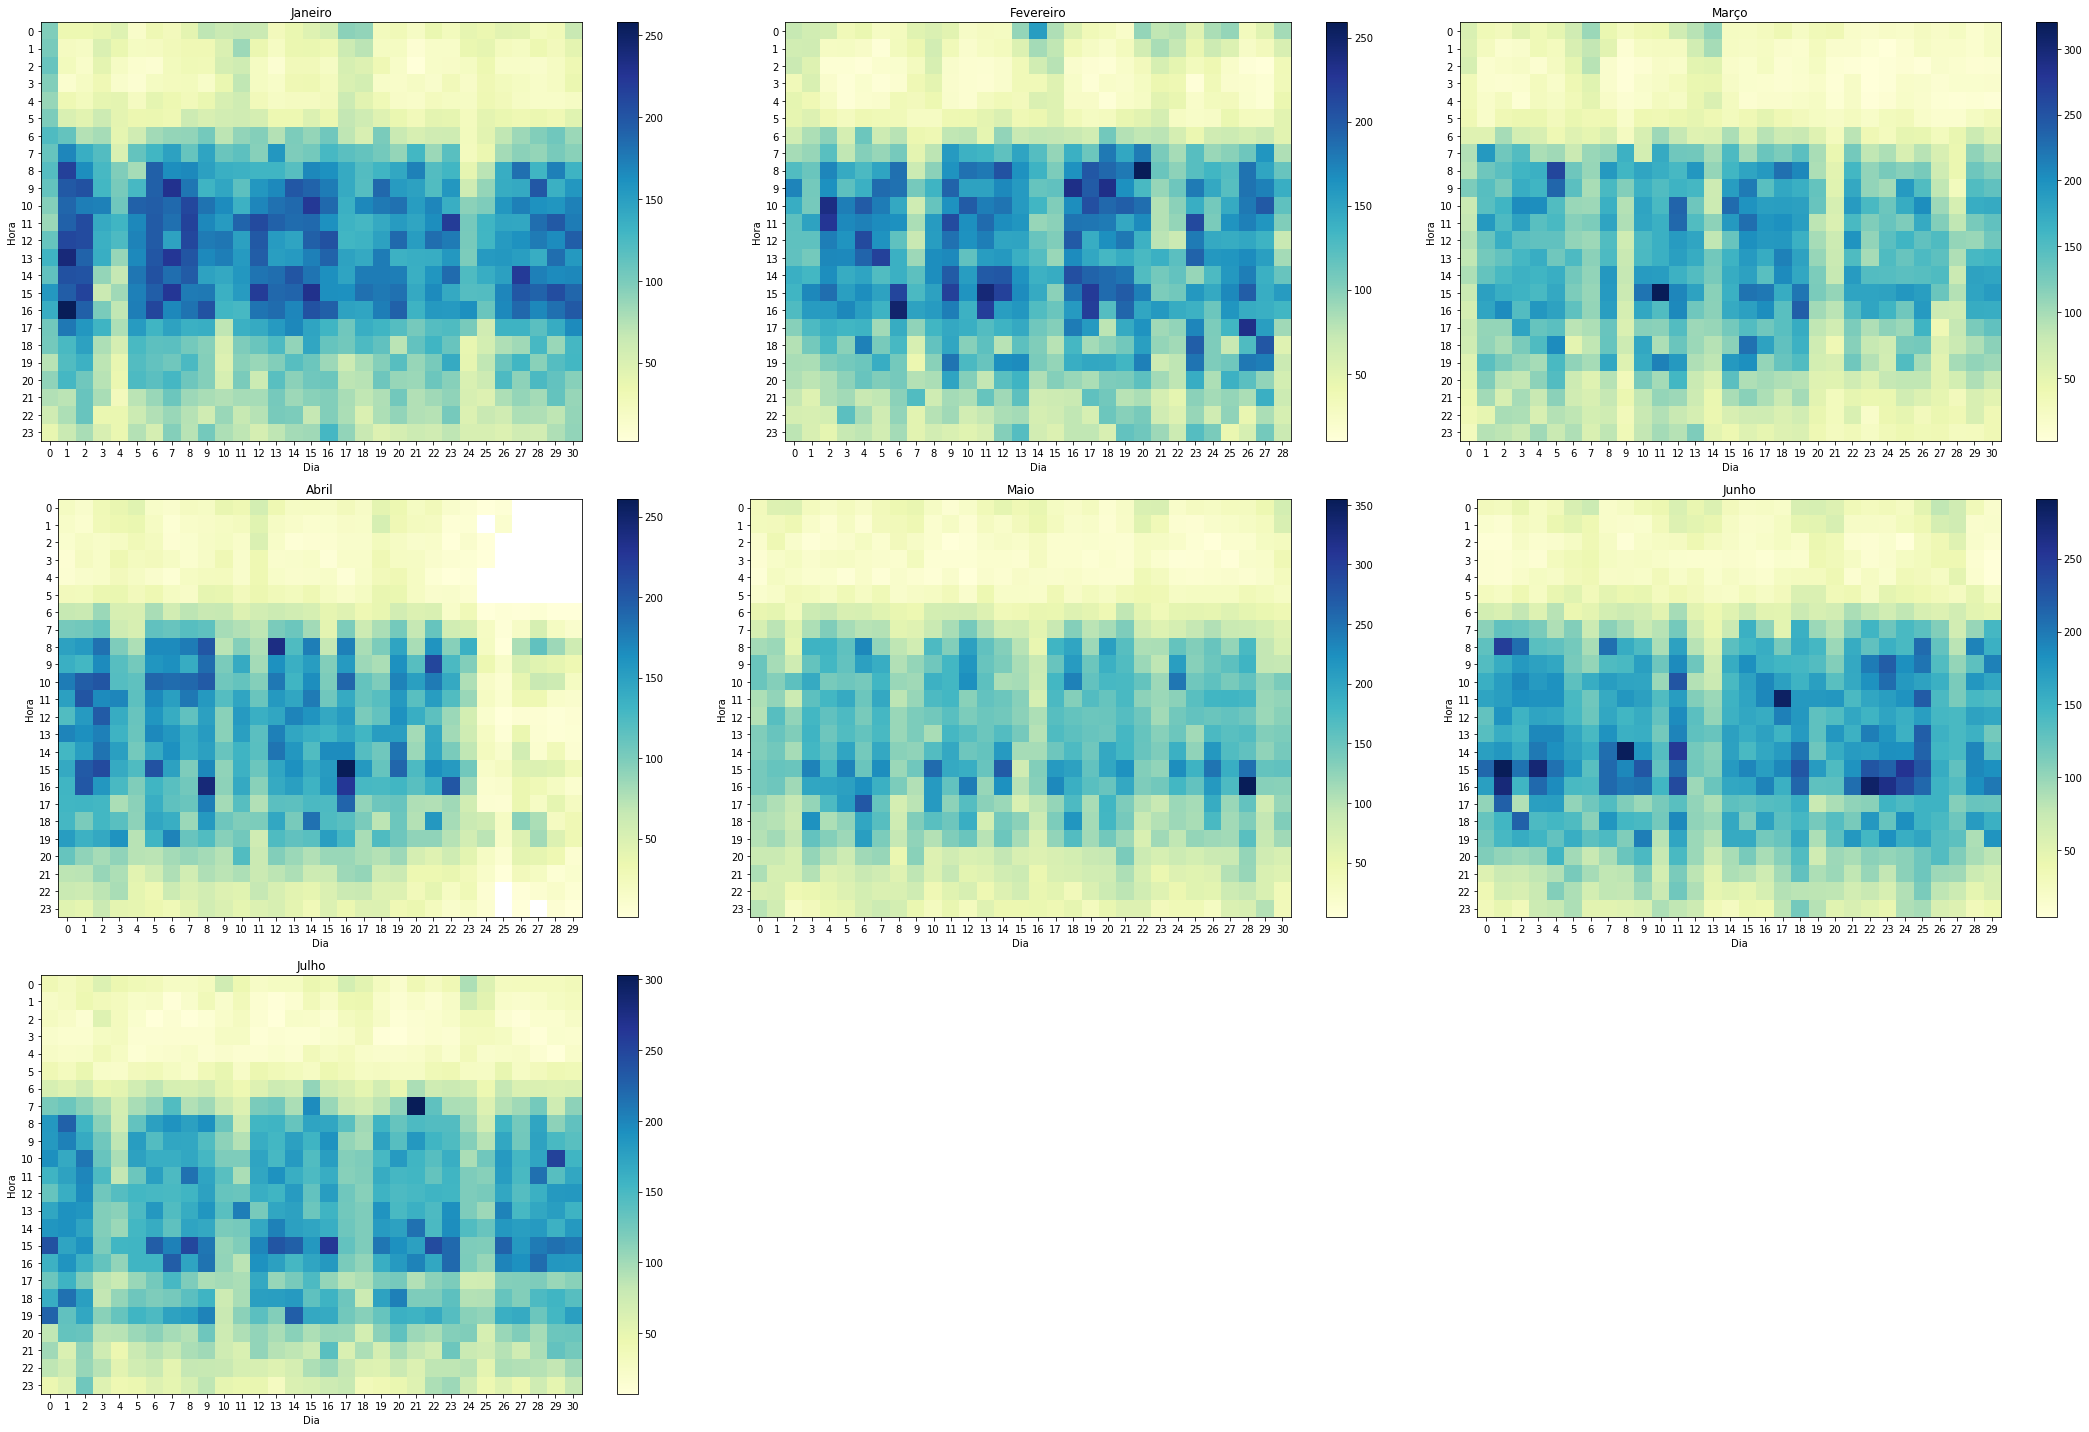

In [16]:
plt.figure(figsize=(30, 20))
plt.subplots_adjust(hspace=0.40, wspace=0.25)
plt.subplot(3, 3, 1)
concentracao = (
    df_transito[df_transito.mes == 1].pivot_table(index='hora',columns='dia_mes', values='mes',aggfunc='count' )
)
plt.imshow(concentracao, cmap="YlGnBu")
plt.colorbar()
plt.xticks(range(len(concentracao.columns)))
plt.yticks(range(len(concentracao.index)))
#plt.legend()
plt.title('Janeiro') #adicionando o título
plt.ylabel('Hora')#adicionando legenda eixo y
plt.xlabel('Dia')#adicionando legenda eixo x


plt.subplot(3, 3, 2)
concentracao = (
    df_transito[df_transito.mes == 2].pivot_table(index='hora',columns='dia_mes', values='mes',aggfunc='count' )
)
plt.imshow(concentracao, cmap="YlGnBu")
plt.colorbar()
plt.xticks(range(len(concentracao.columns)))
plt.yticks(range(len(concentracao.index)))
#plt.legend()
plt.title('Fevereiro') #adicionando o título
plt.ylabel('Hora')#adicionando legenda eixo y
plt.xlabel('Dia')#adicionando legenda eixo x


plt.subplot(3, 3, 3)
concentracao = (
    df_transito[df_transito.mes == 3].pivot_table(index='hora',columns='dia_mes', values='mes',aggfunc='count' )
)
plt.imshow(concentracao, cmap="YlGnBu")
plt.colorbar()
plt.xticks(range(len(concentracao.columns)))
plt.yticks(range(len(concentracao.index)))
#plt.legend()
plt.title('Março') #adicionando o título
plt.ylabel('Hora')#adicionando legenda eixo y
plt.xlabel('Dia')#adicionando legenda eixo x

plt.subplot(3, 3, 4)
concentracao = (
    df_transito[df_transito.mes == 4].pivot_table(index='hora',columns='dia_mes', values='mes',aggfunc='count' )
)
plt.imshow(concentracao, cmap="YlGnBu")
plt.colorbar()
plt.xticks(range(len(concentracao.columns)))
plt.yticks(range(len(concentracao.index)))
#plt.legend()
plt.title('Abril') #adicionando o título
plt.ylabel('Hora')#adicionando legenda eixo y
plt.xlabel('Dia')#adicionando legenda eixo x

plt.subplot(3, 3, 5)
concentracao = (
    df_transito[df_transito.mes == 5].pivot_table(index='hora',columns='dia_mes', values='mes',aggfunc='count' )
)
plt.imshow(concentracao, cmap="YlGnBu")
plt.colorbar()
plt.xticks(range(len(concentracao.columns)))
plt.yticks(range(len(concentracao.index)))
#plt.legend()
plt.title('Maio') #adicionando o título
plt.ylabel('Hora')#adicionando legenda eixo y
plt.xlabel('Dia')#adicionando legenda eixo x

plt.subplot(3, 3, 6)
concentracao = (
    df_transito[df_transito.mes == 6].pivot_table(index='hora',columns='dia_mes', values='mes',aggfunc='count' )
)
plt.imshow(concentracao, cmap="YlGnBu")
plt.colorbar()
plt.xticks(range(len(concentracao.columns)))
plt.yticks(range(len(concentracao.index)))
#plt.legend()
plt.title('Junho') #adicionando o título
plt.ylabel('Hora')#adicionando legenda eixo y
plt.xlabel('Dia')#adicionando legenda eixo x

plt.subplot(3, 3, 7)
concentracao = (
    df_transito[df_transito.mes == 7].pivot_table(index='hora',columns='dia_mes', values='mes',aggfunc='count' )
)
plt.imshow(concentracao, cmap="YlGnBu")
plt.colorbar()
plt.xticks(range(len(concentracao.columns)))
plt.yticks(range(len(concentracao.index)))
#plt.legend()
plt.title('Julho') #adicionando o título
plt.ylabel('Hora')#adicionando legenda eixo y
plt.xlabel('Dia')#adicionando legenda eixo x

plt.tight_layout()
plt.savefig('../data/transito/heatmap.png')
plt.show()

___
#### 7. Alguma bicicleta já tomou multa? Se sim, qual foi a gravidade?

In [17]:
df_transito['tipo_veiculo'].isna().sum()

167

In [18]:
df_transito.query(("tipo_veiculo == 'Bicicleta'") or ("tipo_veiculo == 'BICICLETA'"))
# Apenas uma bibicleta tomou multa e a gravidade da infração foi grave

,tipo_infracao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,grav_tipo,data,dia_da_semana,nome_dia,mes,dia_mes,nome_mes,hora
86643,5843-4,Condutor,Bicicleta,07/04/2020,16:54,Grave,2020-04-07,5,Sábado,4,7,Abril,16


___
#### Leia as informações de cada rodovia utilizando o link abaixo e guarde em um dataframe.
'http://dados.df.gov.br/dataset/3cb44f4a-576c-45b8-8f13-ae94a6623277/resource/2bd0f48e-d3a1-47c6-bd12-83aed24e9461/download/2020-05-19-scr.csv'

In [ ]:
scr[scr.duplicated(subset=['COD. TRECHO'],keep=False)]

In [21]:
scr = pd.read_csv('../data/2020-05-19-scr.csv', sep=';', encoding='latin-1')

In [22]:
scr.tail()

,RODOVIA,COD. TRECHO,INÍCIO,FIM,Km INÍCIO,Km FIM,EXTENSÃO,TP. RODOVIA,SITUAÇÃO,DESC. SITUAÇÃO,RESPONSÁVEL,DESC. RESPONSÁVEL,D.R,DESC. D.R,TMDA,LARG. PISTA,LARG. ACOSTAMENTO,MAT. REVESTIMENTO
628,VC527,527EVC0010,ENTR. DF-445,ENTR. DF-430,0.0,6.9,6.9,Vicinal,IMP,Implantado,DERDF,Departamento de Estradas de Rodagem do DF,5º DR,QUINTO DISTRITO RODOVIÁRIO,NaN,NaN,NaN,NaN
629,VC533,533EVC0010,ENTR. BR-080/BR-251,DIVISA DF/GO,0.0,3.7,3.7,Vicinal,PAV,Pavimentada,DERDF,Departamento de Estradas de Rodagem do DF,5º DR,QUINTO DISTRITO RODOVIÁRIO,NaN,NaN,NaN,NaN
630,VC541,541EVC0010,ENTR. BR-080/BR-251,DIVISA DF/GO,0.0,3.4,3.4,Vicinal,IMP,Implantado,DERDF,Departamento de Estradas de Rodagem do DF,5º DR,QUINTO DISTRITO RODOVIÁRIO,NaN,NaN,NaN,NaN
631,VC547,547EVC0010,ENTR. DF-435,ENTR. BR-080/251,0.0,2.4,2.4,Vicinal,IMP,Implantado,DERDF,Departamento de Estradas de Rodagem do DF,5º DR,QUINTO DISTRITO RODOVIÁRIO,NaN,NaN,NaN,NaN
632,VC555,555EVC0010,ENTR.DF-180,ENTR. BR-080/251,0.0,3.4,3.4,Vicinal,IMP,Implantado,DERDF,Departamento de Estradas de Rodagem do DF,5º DR,QUINTO DISTRITO RODOVIÁRIO,NaN,NaN,NaN,NaN


___
#### 9 Investigando OS TRECHOS responda (TRUE ou FALSE).


> 9.1 Trechos em rodovias 'Distrital' possuem a mesma mediana de extensão de trechos em rodovias 'Federal'. Crie um boxplot para demonstrar e não esqueça de colocar legendas e anotação de texto.
## FALSO

In [23]:
scr[['EXTENSÃO','RESPONSÁVEL']].median()

EXTENSÃO    3.0
dtype: float64

In [24]:
scr.RESPONSÁVEL.replace({'DERDF     ':'DERDF','DNIT      ':'DNIT'}, inplace=True)

In [25]:
scr.query("RESPONSÁVEL == 'DERDF'").EXTENSÃO.median()

3.0

In [26]:
scr.query("RESPONSÁVEL == 'DNIT'").EXTENSÃO.median()

3.3

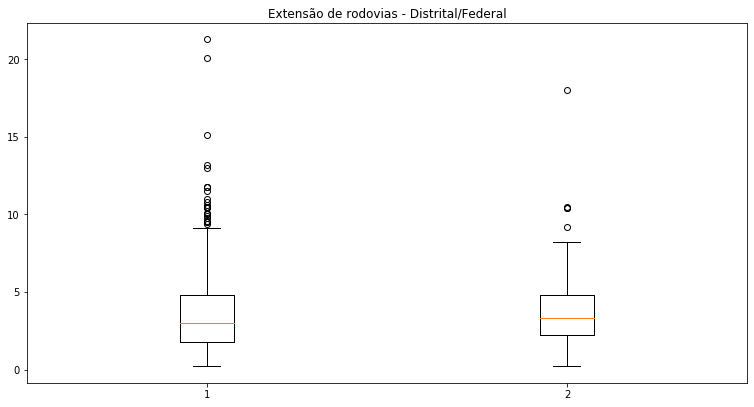

In [27]:
derdf = scr.query("RESPONSÁVEL == 'DERDF'")['EXTENSÃO'] 
dnit = scr.query("RESPONSÁVEL == 'DNIT'")['EXTENSÃO'] 
extensao_rodovias = [derdf, dnit] 
  
fig = plt.figure(figsize =(10, 5)) 
ax = fig.add_axes([0, 0, 1, 1]) 
  
bp = ax.boxplot(extensao_rodovias) 
plt.title('Extensão de rodovias - Distrital/Federal') #adicionando o título

plt.show()

> 9.2 Em termos de extensão, existem mais kms de pista duplicada ('DUP') do que pista pavimentada ('PAV'). Demonstre através de um gráfico de barra.
## FALSO

In [28]:
scr['SITUAÇÃO'].unique()

array(['DUP  ', 'PAV  ', 'IMP  ', 'PLA  ', 'EOP  ', 'NPV  '], dtype=object)

In [29]:
scr.SITUAÇÃO.replace({'DUP  ':'DUP','PAV  ':'PAV','IMP  ':'IMP','PLA  ':'PLA','EOP  ':'EOP','NPV  ':'NPV'}, inplace=True)

In [30]:
scr['SITUAÇÃO'].unique()

array(['DUP', 'PAV', 'IMP', 'PLA', 'EOP', 'NPV'], dtype=object)

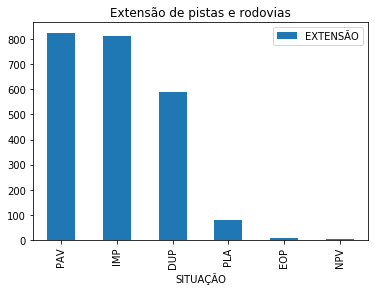

In [31]:
scr_situacao = (
    scr.loc[:,['SITUAÇÃO','EXTENSÃO']]
    #.query("SITUAÇÃO == 'DUP'")
    .groupby('SITUAÇÃO')
    .sum()
    .sort_values('EXTENSÃO',ascending=False)
    .plot(kind='bar',title = 'Extensão de pistas e rodovias')
    .legend()
)
scr_situacao 

> 9.3 Existem somente duas rodovias com mais de 30 trechos.
## VERDADEIRO

In [32]:
scr['RODOVIA'].value_counts()

DF001     36
BR251     32
DF003     28
DF250     19
BR479     19
          ..
VC403      1
DF027      1
VC421      1
DF006      1
VC311      1
Name: RODOVIA, Length: 157, dtype: int64

> 9.4 A distribuição das extensões dos trechos das rodovias federais segue uma distribuição normal. (Demonstre com um gráfico e um teste estatístico)

## FALSO

Text(0.5, 0, 'Extensão dos trechos')

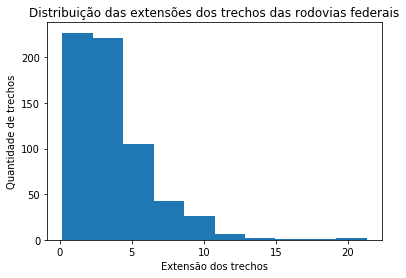

In [33]:
plt.hist(scr['EXTENSÃO'])
plt.title('Distribuição das extensões dos trechos das rodovias federais') #adicionando o título
plt.ylabel('Quantidade de trechos')#adicionando legenda eixo y
plt.xlabel('Extensão dos trechos')#adicionando legenda eixo x

> 9.5 Existe uma diferença estatística entre as médias das extensões da rodovias vicinais e federais. (Demonstre com um teste estatístico)

In [34]:
media_01 = (
    scr.loc[:,['TP. RODOVIA','EXTENSÃO']]
    #.query(['TP. RODOVIA'] == "Distrital"')
    .groupby(['TP. RODOVIA'])
    .median()
)
media_01


,EXTENSÃO
TP. RODOVIA,
Acesso,1.8
Distrital,3.0
Distrital Coincidente,2.0
Federal,3.3
Federal Delegada,3.4
Vicinal,3.5


> 9.6 O 2º DR tem, em média, o maior TMDA (tráfego diário médio anual) se comparado com as médias dos outros distritos. (Demonstre utilizando um gráfico).

## DEPENDE

In [35]:
scr.groupby('D.R').mean()

,Km INÍCIO,Km FIM,EXTENSÃO,TMDA,LARG. PISTA,LARG. ACOSTAMENTO,MAT. REVESTIMENTO
D.R,,,,,,,
1º DR,16.355952,19.827976,3.472024,2012.764706,NaN,NaN,NaN
2º DR,9.448921,13.015108,3.566187,36919.893204,NaN,NaN,NaN
3º DR,19.608696,23.231304,3.622609,41560.017857,NaN,NaN,NaN
4º DR,10.983486,15.120183,4.136697,1541.430380,NaN,NaN,NaN
5º DR,33.957353,37.667647,3.710294,4737.454545,NaN,NaN,NaN


Text(0.5, 0, 'DR')

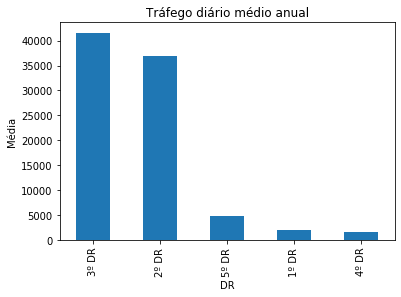

In [36]:
scr.groupby('D.R')['TMDA'].mean().sort_values(ascending=False).plot.bar()
plt.title('Tráfego diário médio anual') #adicionando o título
plt.ylabel('Média')#adicionando legenda eixo y
plt.xlabel('DR')#adicionando legenda eixo x

In [37]:
scr_02 = scr.copy()

In [38]:
scr_02.TMDA.isna().sum()

258

In [39]:
scr_02.TMDA.mean()

17636.056

In [40]:
scr_02.TMDA.fillna(0, inplace=True)

Text(0.5, 0, 'DR')

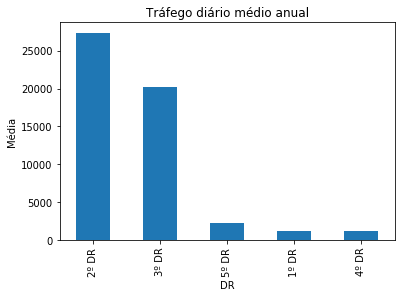

In [41]:
scr_02.groupby('D.R')['TMDA'].mean().sort_values(ascending=False).plot.bar()
plt.title('Tráfego diário médio anual') #adicionando o título
plt.ylabel('Média')#adicionando legenda eixo y
plt.xlabel('DR')#adicionando legenda eixo x

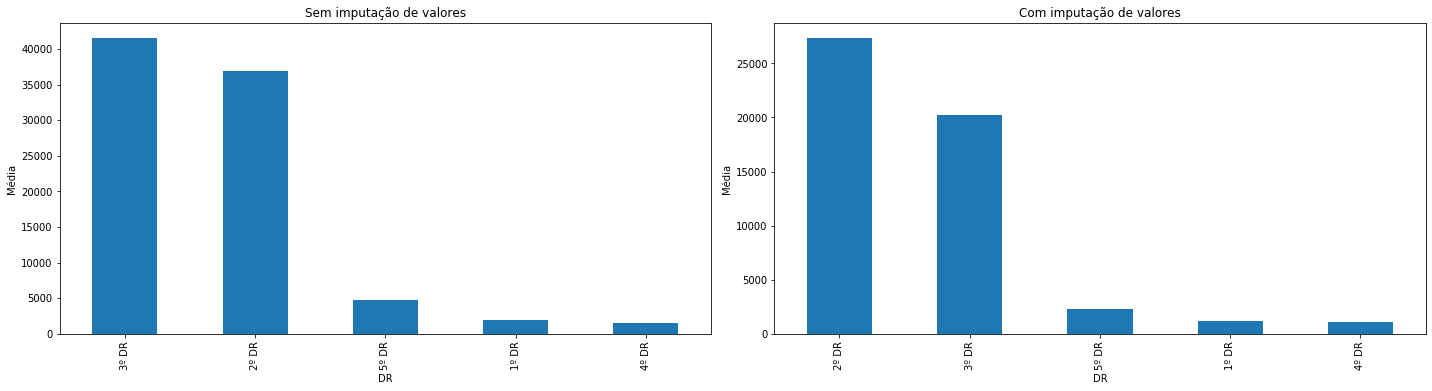

In [42]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
scr.groupby('D.R')['TMDA'].mean().sort_values(ascending=False).plot.bar()
plt.title('Sem imputação de valores') #adicionando o título
plt.ylabel('Média')#adicionando legenda eixo y
plt.xlabel('DR')#adicionando legenda eixo x


plt.subplot(2, 2, 2)
scr_02.groupby('D.R')['TMDA'].mean().sort_values(ascending=False).plot.bar()
plt.title('Com imputação de valores') #adicionando o título
plt.ylabel('Média')#adicionando legenda eixo y
plt.xlabel('DR')#adicionando legenda eixo x

plt.tight_layout()
plt.show()

___
#### 11. Leia as informações de Obra de Arte Especial (OAE) utilizando o link abaixo e guarde em um dataframe.
'http://dados.df.gov.br/dataset/468f0b08-f5ae-4d61-954c-3062a9d26dad/resource/fac7a26a-baa3-4250-9ae5-b9c7273ae8df/download/2020-05-19-oae.csv'

In [43]:
oae = pd.read_csv('../data/2020-05-19-oae.csv', sep=';', encoding='latin-1')

In [44]:
oae[oae.duplicated(subset=['DESCRITIVO'],keep=False)]

,COD. OAE,DESCRITIVO,TIPO DE OAE,COD. SITUAÇÃO,SITUAÇÃO,TP. ESTRUTURAL,REG. ADMINISTRATIVA,SETOR,DISTRITO,RODOVIA,...,RAMPA,EM CURVA,Nº DE PISTAS,Nº DE FAIXAS,LARG. ACOSTAMENTO,LARG. PASSEIO,ALT. GUARDA-CORPO,LARG. AFASTAMENTOS,LATITUTE,LONGITUDE
48,51,Viaduto sobre Ferrovia,VIAD. SOBRE FERROVIA,14,Boa,Concreto,NaN,3º DR,TERCEIRO DISTRITO RODOVIÁRIO,DF003,...,N,N,2.0,6.0,2.5,1.20,0.20,0.5,-15.883.462.455.528,-47.960.328.176.048
61,64,Ponte sobre Ribeirão Sobradinho,PONTE,12,Ruim,Concreto,NaN,2º DR,SEGUNDO DISTRITO RODOVIÁRIO,DF326,...,N,N,NaN,NaN,NaN,0.70,0.15,NaN,-15.636.929.909.250,-47.802.927.012.250
63,66,Viaduto 1 na DF-004,VIAD. SOBRE ROD./RUA,14,Boa,Concreto,NaN,2º DR,SEGUNDO DISTRITO RODOVIÁRIO,DF004,...,N,N,NaN,NaN,NaN,1.60,0.15,NaN,-15.775.540.994.750,-47.864.225.423.000
64,67,Viaduto 1 na DF-004,VIAD. SOBRE ROD./RUA,14,Boa,Concreto,NaN,2º DR,SEGUNDO DISTRITO RODOVIÁRIO,DF004,...,N,N,1.0,3.0,NaN,1.60,0.15,NaN,-15.775.503.276.000,-47.864.103.508.000
67,71,Ponte sobre Ribeirão Sobradinho,PONTE,14,Boa,Concreto,NaN,2º DR,SEGUNDO DISTRITO RODOVIÁRIO,BR010,...,N,N,NaN,NaN,NaN,1.20,NaN,NaN,-15.713.269.668.750,-47.761.852.277.750
70,74,Ponte sobre Rio São Bartolomeu,PONTE,14,Boa,Concreto,NaN,1º DR,PRIMEIRO DISTRITO RODOVIÁRIO,DF250,...,N,N,NaN,NaN,NaN,0.70,0.15,NaN,-15.734.257.704.000,-47.675.742.699.250
77,81,Viaduto 1 na DF-004,VIAD. SOBRE ROD./RUA,14,Boa,Concreto,NaN,2º DR,SEGUNDO DISTRITO RODOVIÁRIO,DF004,...,N,N,1.0,3.0,NaN,1.20,0.15,NaN,-15.805.278.515.250,-47.854.162.738.500
78,82,Viaduto 2 na DF-004,VIAD. SOBRE ROD./RUA,14,Boa,Concreto,NaN,2º DR,SEGUNDO DISTRITO RODOVIÁRIO,DF004,...,N,N,1.0,3.0,NaN,1.20,0.15,NaN,-15.804.975.441.750,-47.854.368.617.000
81,85,Viaduto 1 na DF-004,VIAD. SOBRE ROD./RUA,14,Boa,Concreto,NaN,2º DR,SEGUNDO DISTRITO RODOVIÁRIO,DF004,...,N,N,1.0,3.0,NaN,1.20,0.15,NaN,-15.793.044.825.250,-47.857.699.492.750
82,86,Viaduto 2 na DF-004,VIAD. SOBRE ROD./RUA,14,Boa,Concreto,NaN,2º DR,SEGUNDO DISTRITO RODOVIÁRIO,DF004,...,N,N,NaN,NaN,NaN,1.20,0.20,NaN,-15.796.610.741.500,-47.854.160.009.250


In [45]:
oae.drop_duplicates(subset=['DESCRITIVO'],inplace=True)

In [46]:
oae[oae.duplicated(subset=['DESCRITIVO'],keep=False)]

,COD. OAE,DESCRITIVO,TIPO DE OAE,COD. SITUAÇÃO,SITUAÇÃO,TP. ESTRUTURAL,REG. ADMINISTRATIVA,SETOR,DISTRITO,RODOVIA,...,RAMPA,EM CURVA,Nº DE PISTAS,Nº DE FAIXAS,LARG. ACOSTAMENTO,LARG. PASSEIO,ALT. GUARDA-CORPO,LARG. AFASTAMENTOS,LATITUTE,LONGITUDE


___
#### 12. Avalie (TRUE OU FALSE):

In [47]:
oae.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 0 to 333
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COD. OAE             311 non-null    int64  
 1   DESCRITIVO           311 non-null    object 
 2   TIPO DE OAE          311 non-null    object 
 3   COD. SITUAÇÃO        311 non-null    int64  
 4   SITUAÇÃO             311 non-null    object 
 5   TP. ESTRUTURAL       311 non-null    object 
 6   REG. ADMINISTRATIVA  0 non-null      object 
 7   SETOR                311 non-null    object 
 8   DISTRITO             311 non-null    object 
 9   RODOVIA              311 non-null    object 
 10  COD. TRECHO          311 non-null    object 
 11  DESCRITIVO.1         311 non-null    object 
 12  km                   311 non-null    float64
 13  PISTA                198 non-null    object 
 14  COMP. TOTAL          301 non-null    float64
 15  LARG. TOTAL          301 non-null    flo

In [48]:
oae.loc[:,['COD. OAE','RODOVIA','km']]

,COD. OAE,RODOVIA,km
0,1,DF005,2.558
1,2,DF005,9.418
2,3,DF003,12.929
3,4,DF003,10.906
4,5,BR010,0.244
...,...,...,...
329,658,DF440,8.347
330,659,DF007,1.996
331,660,DF001,16.000
332,661,DF075,2.710


In [49]:
oae['COD. OAE'].isna().sum(),oae['LARG. PASSEIO'].isna().sum(),oae['km'].isna().sum(),oae['ALT. GUARDA-CORPO'].isna().sum()

(0, 137, 0, 90)

In [50]:
oae['LARG. PASSEIO'].isna().sum(),round(oae['LARG. PASSEIO'].mean(),2)

(137, 1.95)

In [51]:
oae['ALT. GUARDA-CORPO'].isna().sum(),round(oae['ALT. GUARDA-CORPO'].mean(),2)

(90, 0.42)

In [52]:
oae['LARG. PASSEIO'].fillna(round(oae['LARG. PASSEIO'].mean(),2), inplace=True)
oae['ALT. GUARDA-CORPO'].fillna(round(oae['ALT. GUARDA-CORPO'].mean(),2), inplace=True)

> 12.1 A correlação entre a quantidade de OAE e a extensão total das rodovias (soma da ### extensão dos trechos) é maior do que 0.8

## FALSO

In [53]:
oae[['COD. OAE','RODOVIA','km']].groupby('RODOVIA').agg({'COD. OAE':'sum','km':'sum'}).corr()

,COD. OAE,km
COD. OAE,1.000000,0.549414
km,0.549414,1.000000


> 12.2 A correlação entre a largura do passeio e a altura do guarda-corpo das pontes é menor do que 0.2

## VERDADEIRO

In [54]:
oae[['LARG. PASSEIO','ALT. GUARDA-CORPO']].corr()

,LARG. PASSEIO,ALT. GUARDA-CORPO
LARG. PASSEIO,1.000000,-0.001044
ALT. GUARDA-CORPO,-0.001044,1.000000


___
### 13. Siga as instruções.

> 13.1 Crie um dataframe chamado dist_oae com as informações COD.OAE, LONGITUDE, LATITUDE de cada OAE.

In [55]:
dist_oae = pd.read_csv('../data/2020-05-19-oae.csv', sep=';',usecols=["COD. OAE","LONGITUDE","LATITUTE"], encoding='latin-1')

In [56]:
dist_oae.tail()

,COD. OAE,LATITUTE,LONGITUDE
329,658,-15.709.300.935.342,-47.758.615.786.982
330,659,-15.730.370.842.992,-47.894.312.745.072
331,660,-15.788.978.438.604,-47.778.286.556.055
332,661,-15.873.396.808.131,-47.979.001.305.518
333,662,-15.873.396.808.131,-47.979.001.305.518


> 13.2 Trate as colunas de latitude e longitude, transformando-as de string para float. (ex: '-47.865.095.411.000' de ser transformado em -47.865095411000)

In [57]:
def ajuste_latitude(value):
    
    lat_01 = value.replace(".", '')
    lat_02 = lat_01[0:3]+"."+lat_01[3:]
    return float(lat_02)

In [58]:
def ajuste_longitude(value):
    
    long_01 = value.replace(".", '')
    long_02 = long_01[0:3]+"."+long_01[3:]
    return float(long_02)

In [59]:
dist_oae['latitude'] = dist_oae.LATITUTE.apply(ajuste_latitude)

In [60]:
dist_oae['longitude'] = dist_oae.LONGITUDE.apply(ajuste_longitude)

In [61]:
dist_oae.isna().sum()

COD. OAE     0
LATITUTE     0
LONGITUDE    0
latitude     0
longitude    0
dtype: int64

In [62]:
dist_oae[dist_oae.duplicated(subset=['COD. OAE'],keep=False)]

,COD. OAE,LATITUTE,LONGITUDE,latitude,longitude


In [63]:
dist_oae.tail()

,COD. OAE,LATITUTE,LONGITUDE,latitude,longitude
329,658,-15.709.300.935.342,-47.758.615.786.982,-15.709301,-47.758616
330,659,-15.730.370.842.992,-47.894.312.745.072,-15.730371,-47.894313
331,660,-15.788.978.438.604,-47.778.286.556.055,-15.788978,-47.778287
332,661,-15.873.396.808.131,-47.979.001.305.518,-15.873397,-47.979001
333,662,-15.873.396.808.131,-47.979.001.305.518,-15.873397,-47.979001


> 13.3 Transforme dist_oae em um GeoDataFrame e no parâmetro geometry passe a função do geopandas points_fromn_xy com as informações de longitude e latitude em formato de serie.

In [64]:
gdf = geopandas.GeoDataFrame(dist_oae,
                            geometry = geopandas.points_from_xy(dist_oae['longitude'],dist_oae['latitude']))

In [65]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [66]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   COD. OAE   334 non-null    int64   
 1   LATITUTE   334 non-null    object  
 2   LONGITUDE  334 non-null    object  
 3   latitude   334 non-null    float64 
 4   longitude  334 non-null    float64 
 5   geometry   334 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 15.8+ KB


In [67]:
gdf.head()

,COD. OAE,LATITUTE,LONGITUDE,latitude,longitude,geometry
0,1,-15.717.124.576.250,-47.865.095.411.000,-15.717125,-47.865095,POINT (-47.86510 -15.71712)
1,2,-15.750.428.216.750,-47.814.948.902.250,-15.750428,-47.814949,POINT (-47.81495 -15.75043)
2,3,-15.774.612.361.653,-47.937.965.129.068,-15.774612,-47.937965,POINT (-47.93797 -15.77461)
3,4,-15.758.446.956.227,-47.928.382.039.529,-15.758447,-47.928382,POINT (-47.92838 -15.75845)
4,5,-15.687.729.224.750,-47.857.120.883.000,-15.687729,-47.857121,POINT (-47.85712 -15.68773)


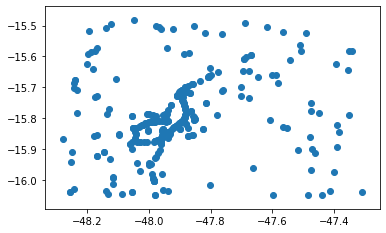

In [68]:
gdf.geometry.plot()

___
#### 14. Usando os pontos em geometry do GeoDataFrame dist_oae monte um mapa utilizando folium que contenha todas as obras de artes especiais (dica: para extrair a latitude ou longitude de um ponto basta utilizar os métodos .x ou .y). Adicione no tooltip de cada Marker o tipo da OAE.

In [69]:
mapa = fl.Map(location=[-15.717125,	-47.865095],tiles='OpenStreetMap')

In [72]:
mapa

In [71]:
lista_de_marcadores = dist_oae.loc[:,['latitude','longitude']].values.tolist()
for idx,marcador in enumerate(lista_de_marcadores):
    fl.Marker(marcador,tootlip=f'Meu marcador {idx}').add_to(mapa)

In [ ]:
#fl.Marker([47.638013,-122.325167], popup='Meu primeiro marcador').add_to(mapa)

___
#### 15. Descruba a distância entre a OAE de código 1 e todas as outras OAE (utilize o método .distance de cada point em geometry). Crie um subplot com 2 gráficos, o primeiro deverá conter um histograma de todas as distâncias e o segundo deverá ser um boxplot de todas as distâncias.

In [73]:
gdf.geometry.distance(gdf.geometry[0])

0      0.000000
1      0.060198
2      0.092816
3      0.075583
4      0.030458
         ...   
329    0.106767
330    0.032080
331    0.112689
332    0.193379
333    0.193379
Length: 334, dtype: float64

In [74]:
distancias = gdf.geometry.distance(gdf.geometry[0])

In [75]:
type(gdf.geometry.distance(gdf.geometry[0]))

pandas.core.series.Series

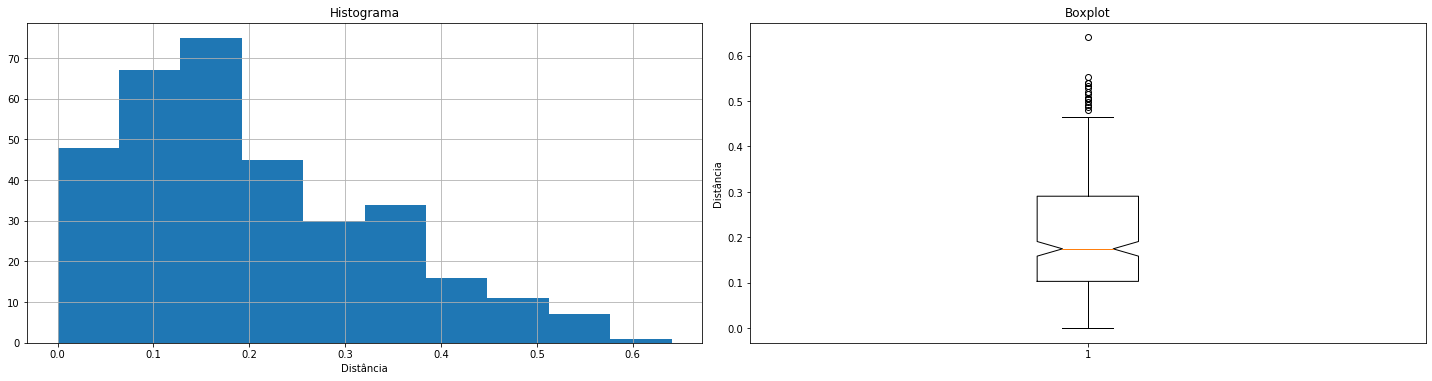

In [76]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
gdf.geometry.distance(gdf.geometry[0]).hist()
plt.title('Histograma') #adicionando o título
plt.xlabel('Distância')#adicionando legenda eixo x

plt.subplot(2, 2, 2)
box_dict = plt.boxplot(distancias ,vert=True,notch=True,whis=1)
plt.title('Boxplot') #adicionando o título
plt.ylabel('Distância')#adicionando legenda eixo y


plt.tight_layout()
plt.show()